In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Suspicious Patterns

## Data

In [3]:
ob = pd.read_csv('https://raw.githubusercontent.com/1712n/market-data-challenge/refs/heads/main/eth-btc-orderbooks.csv')
ob.head()

,timestamp,asks,bids
0,2025-09-01 00:13:09.511132300+00:00,"[{'price': 0.04100829, 'size': 0.02288708}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
1,2025-09-01 00:31:23.134173200+00:00,"[{'price': 0.04097411, 'size': 0.02047798}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
2,2025-09-01 00:49:37.173137500+00:00,"[{'price': 0.04091134, 'size': 0.02229217}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
3,2025-09-01 01:07:51.274078600+00:00,"[{'price': 0.04103079, 'size': 0.07205901}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
4,2025-09-01 01:26:07.248503+00:00,"[{'price': 0.04100837, 'size': 0.02019721}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."


In [2]:
trd = pd.read_csv('https://raw.githubusercontent.com/1712n/market-data-challenge/refs/heads/main/eth-btc-trades.csv')
trd.head()

,timestamp,price,size,side
0,2025-09-01 00:02:57+00:00,0.040800,0.000441,SELL
1,2025-09-01 00:02:57+00:00,0.040700,0.002478,SELL
2,2025-09-01 00:02:57+00:00,0.040700,0.020152,SELL
3,2025-09-01 00:02:57+00:00,0.040600,0.002460,SELL
4,2025-09-01 00:03:14+00:00,0.040812,91.455503,BUY


In [12]:
ob.iloc[0]['asks']

"[{'price': 0.04100829, 'size': 0.02288708}, {'price': 0.04109, 'size': 0.00249469}, {'price': 0.0411, 'size': 0.00245985}, {'price': 0.04112342, 'size': 0.00935766}, {'price': 0.04117066, 'size': 0.10289232}, {'price': 0.0412, 'size': 0.00247837}, {'price': 0.04127887, 'size': 0.00514814}, {'price': 0.04129712, 'size': 0.02982162}, {'price': 0.0413, 'size': 0.0024723}, {'price': 0.0415, 'size': 0.05628606}, {'price': 0.04152, 'size': 0.00024939}, {'price': 0.04157, 'size': 0.00124909}, {'price': 0.0416, 'size': 0.01072836}, {'price': 0.04162, 'size': 0.00024879}, {'price': 0.04167, 'size': 0.00024849}, {'price': 0.04169613, 'size': 0.002}, {'price': 0.0417, 'size': 0.0025}, {'price': 0.04172, 'size': 0.00024819}, {'price': 0.04177, 'size': 0.00024789}, {'price': 0.0418, 'size': 0.0025}, {'price': 0.04180188, 'size': 0.0024718}, {'price': 0.04182, 'size': 0.00024663}, {'price': 0.04187, 'size': 0.00024705}, {'price': 0.0419, 'size': 0.0025}, {'price': 0.04191919, 'size': 0.00369912}, {

In [4]:
sell = trd[trd['side'] == 'SELL'].groupby('timestamp').sum()
buy = trd[trd['side'] == 'BUY'].groupby('timestamp').sum()

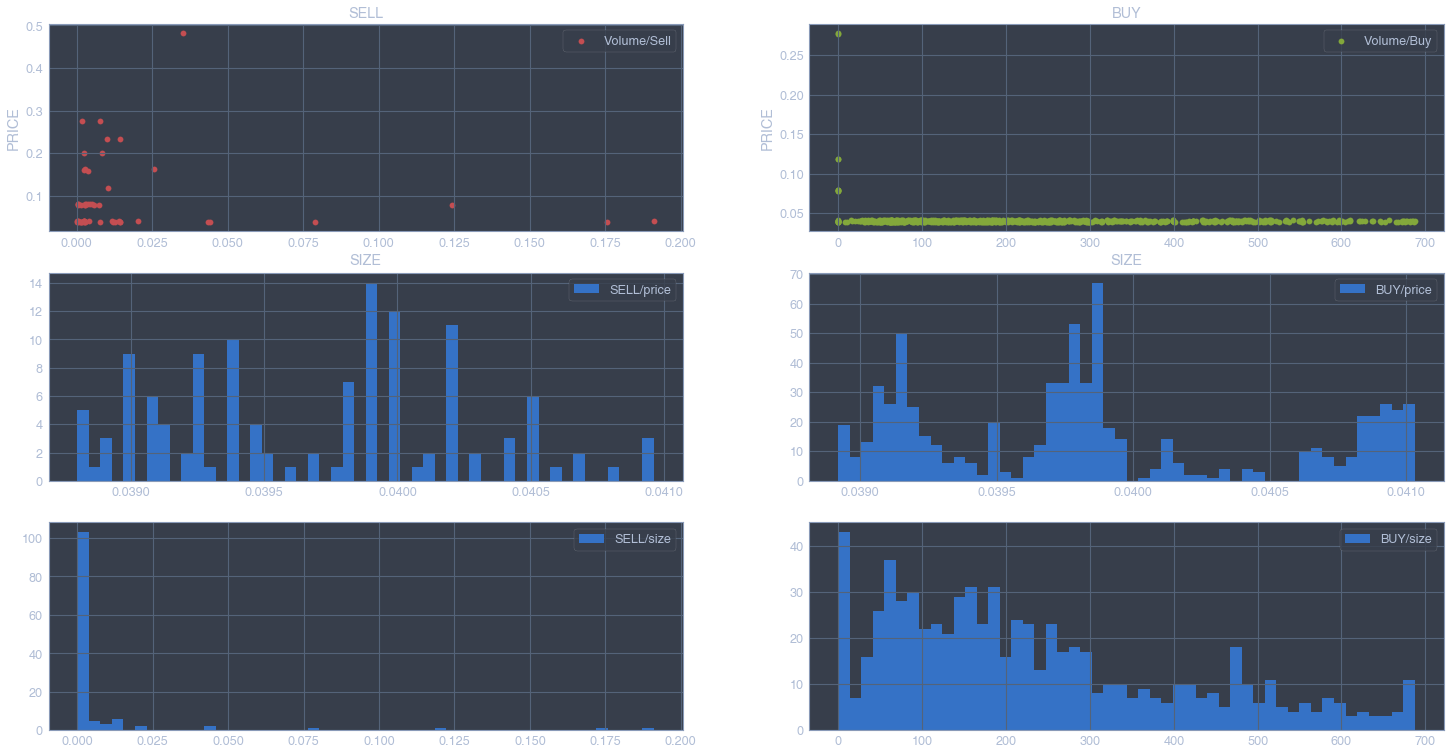

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(25, 13))

ax[0, 0].scatter(sell['size'], sell['price'], label='Volume/Sell', c='r')
ax[0, 0].set_xlabel('SIZE')
ax[0, 0].set_ylabel('PRICE')
ax[0, 0].set_title('SELL')
ax[0, 0].legend()

ax[0, 1].scatter(buy['size'], buy['price'], label='Volume/Buy', c='g')
ax[0, 1].set_xlabel('SIZE')
ax[0, 1].set_ylabel('PRICE')
ax[0, 1].set_title('BUY')
ax[0, 1].legend()

ax[1, 0].hist(trd[trd['side'] == 'SELL']['price'], bins=50, label='SELL/price')
ax[1, 0].legend()
ax[1, 1].hist(trd[trd['side'] == 'BUY']['price'], bins=50, label='BUY/price')
ax[1, 1].legend()
ax[2, 0].hist(trd[trd['side'] == 'SELL']['size'], bins=50, label='SELL/size')
ax[2, 0].legend()
ax[2, 1].hist(trd[trd['side'] == 'BUY']['size'], bins=50, label='BUY/size')
ax[2, 1].legend();

In [35]:
trd[trd['side'] == 'BUY'].sort_values('size', )[:10]

,timestamp,price,size,side
702,2025-09-03 10:15:41+00:00,0.039100,5.600000e-07,BUY
700,2025-09-03 10:15:05+00:00,0.039050,8.200000e-07,BUY
698,2025-09-03 10:14:36+00:00,0.039000,2.090000e-06,BUY
758,2025-09-03 14:10:23+00:00,0.039692,1.174000e-05,BUY
385,2025-09-02 06:49:17+00:00,0.039504,1.309000e-05,BUY
745,2025-09-03 13:43:46+00:00,0.039497,5.333000e-05,BUY
746,2025-09-03 13:43:46+00:00,0.039497,2.072500e-04,BUY
285,2025-09-01 21:51:51+00:00,0.039801,2.512500e-04,BUY
697,2025-09-03 10:14:35+00:00,0.039000,2.582100e-04,BUY
701,2025-09-03 10:15:41+00:00,0.039100,2.590800e-04,BUY


In [33]:
buy.sort_values('size')[:20]

,price,size
timestamp,,
2025-09-03 10:14:36+00:00,0.039000,0.000002
2025-09-02 06:49:17+00:00,0.039504,0.000013
2025-09-01 21:51:51+00:00,0.039801,0.000251
2025-09-03 10:14:35+00:00,0.039000,0.000258
2025-09-03 10:15:41+00:00,0.078200,0.000260
2025-09-03 10:15:05+00:00,0.078100,0.000260
2025-09-03 13:43:46+00:00,0.118490,0.000520
2025-09-03 15:56:26+00:00,0.039800,0.001134
2025-09-03 15:56:29+00:00,0.079600,0.001391


In [8]:
buy.sort_values('price', ascending=False)[:20]

,price,size
timestamp,,
2025-09-03 14:10:23+00:00,0.277851,0.004829
2025-09-03 13:43:45+00:00,0.276476,0.001948
2025-09-03 14:09:09+00:00,0.118820,0.008938
2025-09-03 13:43:46+00:00,0.118490,0.000520
2025-09-03 15:56:29+00:00,0.079600,0.001391
2025-09-02 01:15:58+00:00,0.079569,0.021050
2025-09-03 12:22:25+00:00,0.078956,0.027652
2025-09-03 10:15:41+00:00,0.078200,0.000260
2025-09-03 10:15:05+00:00,0.078100,0.000260
